Let's try to replicate the following R code / visualizations in Python:

https://blakocha.github.io/DAR2025/Notes20251117.html

In [ ]:
# pip install kagglehub

In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhilash04/fathersandsonheight")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\lab821-17\.cache\kagglehub\datasets\abhilash04\fathersandsonheight\versions\1


In [14]:
import pandas as pd
import os

csv_path = os.path.join(path, "Pearson.txt")  # filename may vary
df = pd.read_csv(csv_path, sep="\t")

print(df.head())

   Father   Son
0    65.0  59.8
1    63.3  63.2
2    65.0  63.3
3    65.8  62.8
4    61.1  64.3


In [8]:
# pip install plotnine

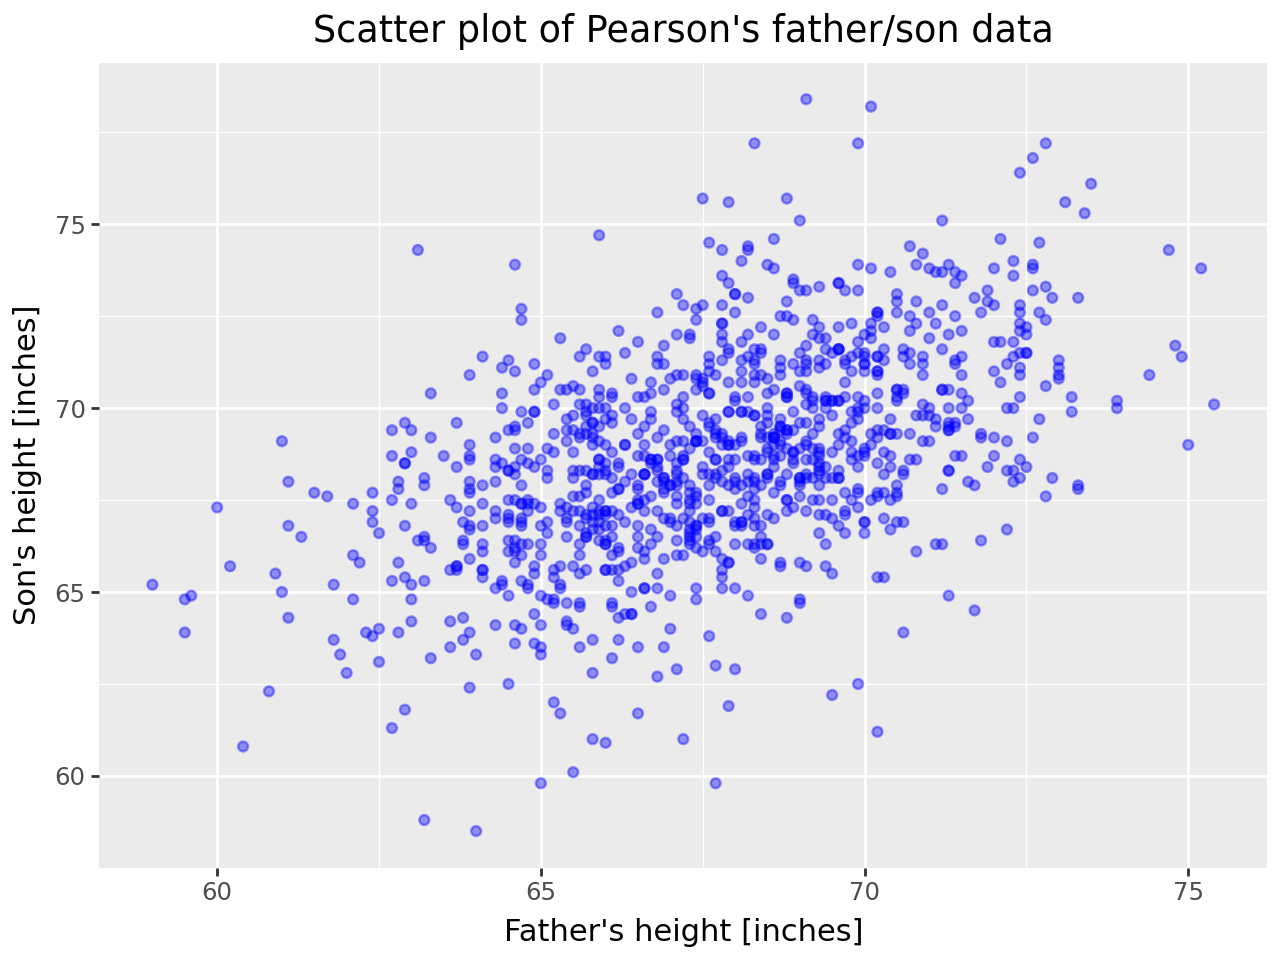

In [40]:
from plotnine import *

(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

In [44]:
# Auxiliary table with the families where rounded height of the father is 70 inches
df70 = df.loc[ round(df['Father']) == 70 ]
print(df70.head())

    Father   Son
21    69.5  65.5
49    69.6  69.0
68    69.6  66.8
69    70.4  66.7
70    70.0  66.9


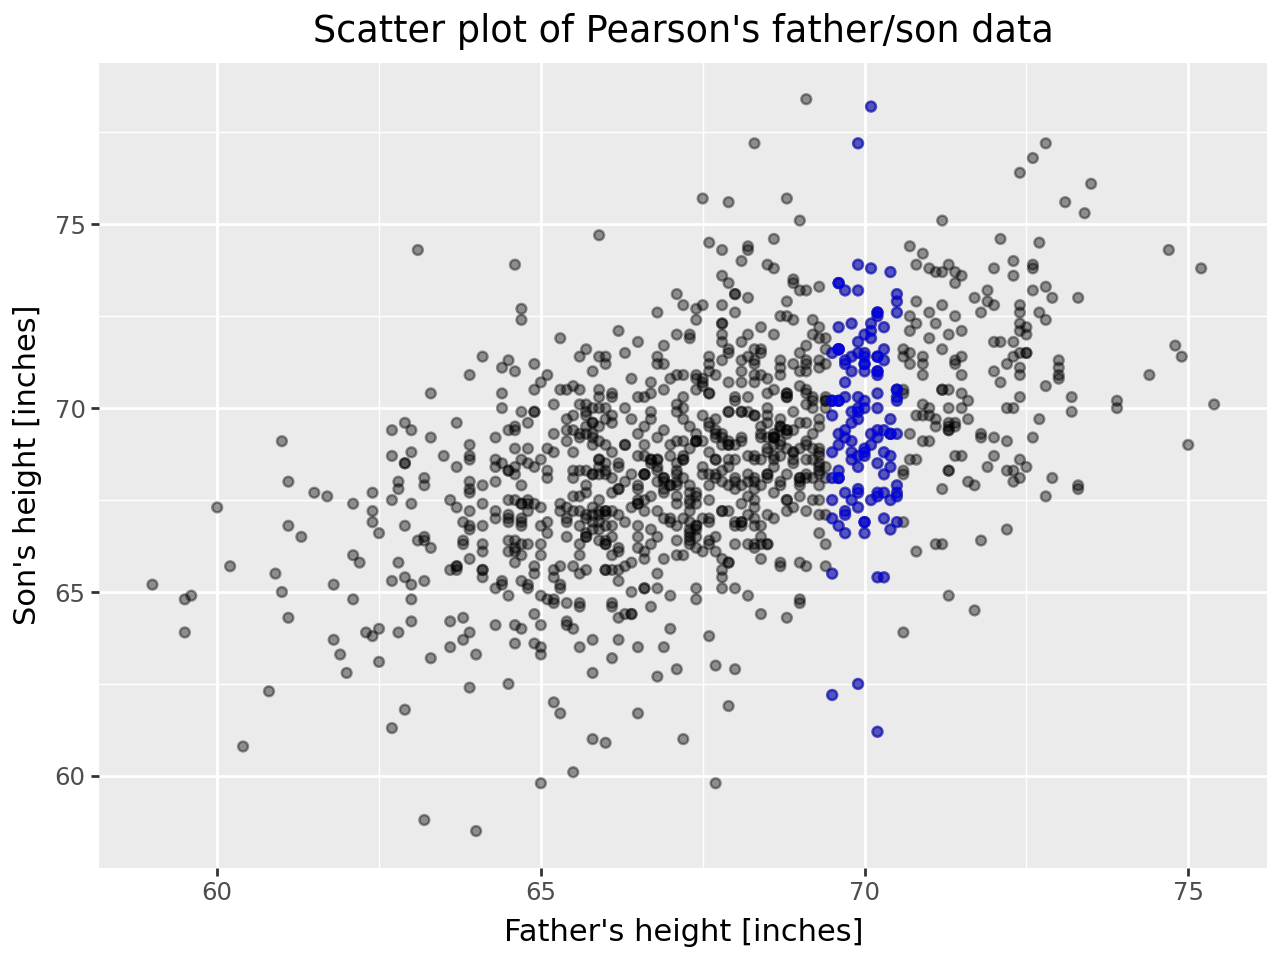

In [45]:
(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

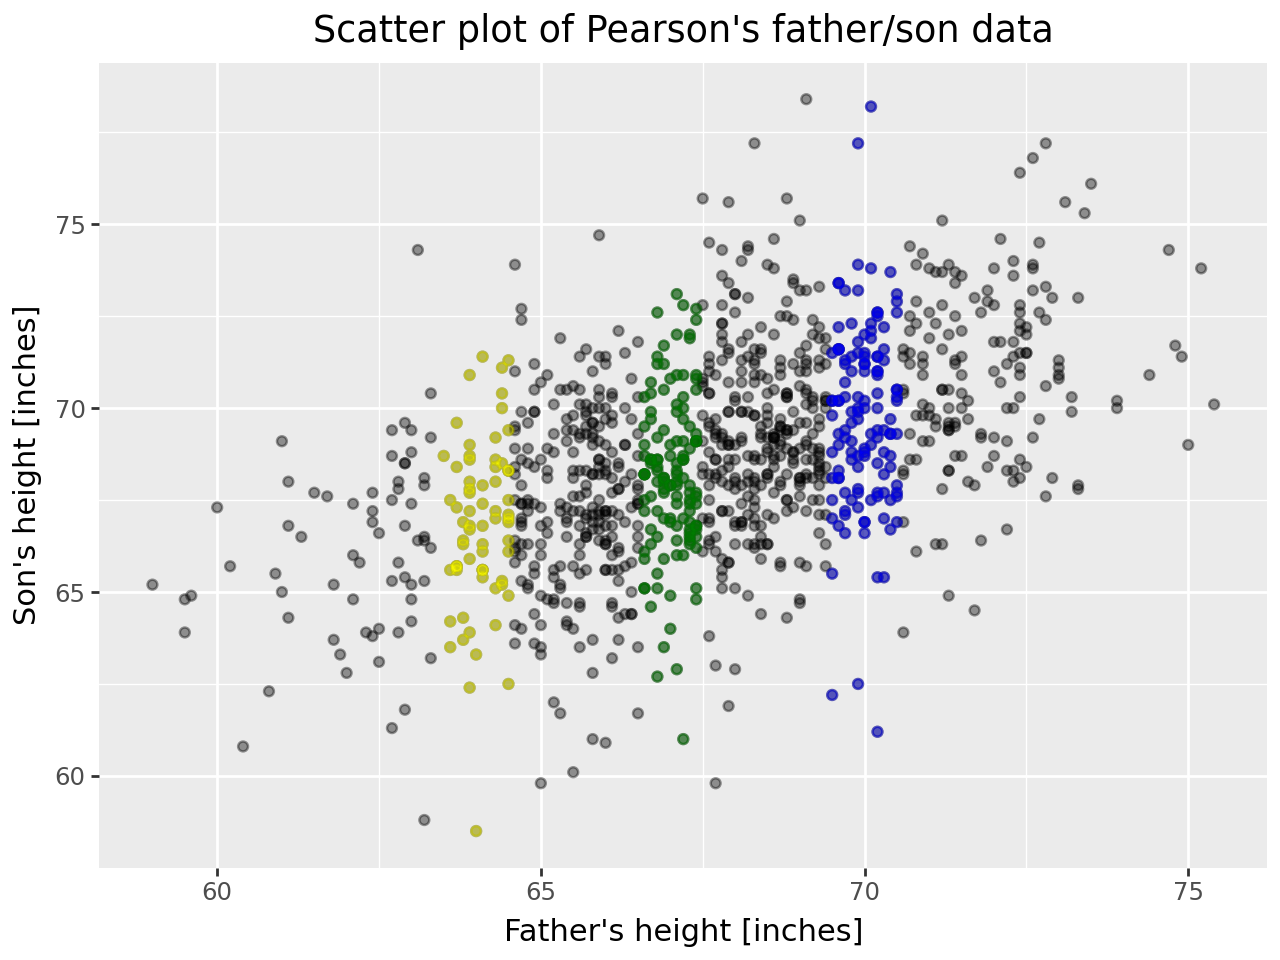

In [47]:
df64 = df.loc[ round(df['Father']) == 64 ]
df67 = df.loc[ round(df['Father']) == 67 ]

(
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df64, alpha = 0.4, colour = "yellow") +
  geom_point(data = df67, alpha = 0.4, colour = "green") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

In [49]:
avgs_64 = np.mean(df64['Son'])
print(avgs_64)
avgs_67 = np.mean(df67['Son'])
print(avgs_67)
avgs_70 = np.mean(df70['Son'])
print(avgs_70)

66.83484848484848
68.15203252032519
69.71023622047245


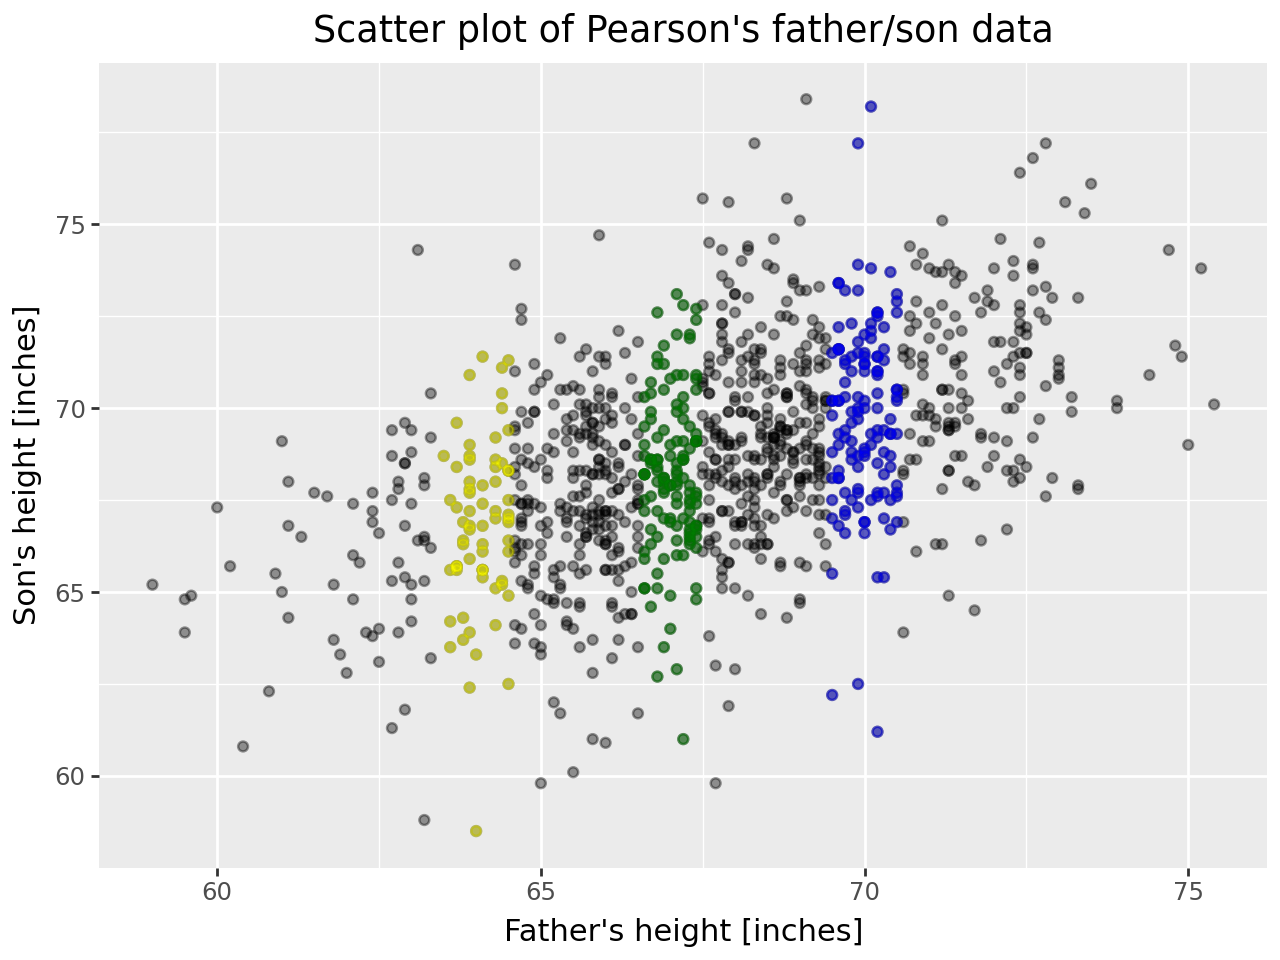

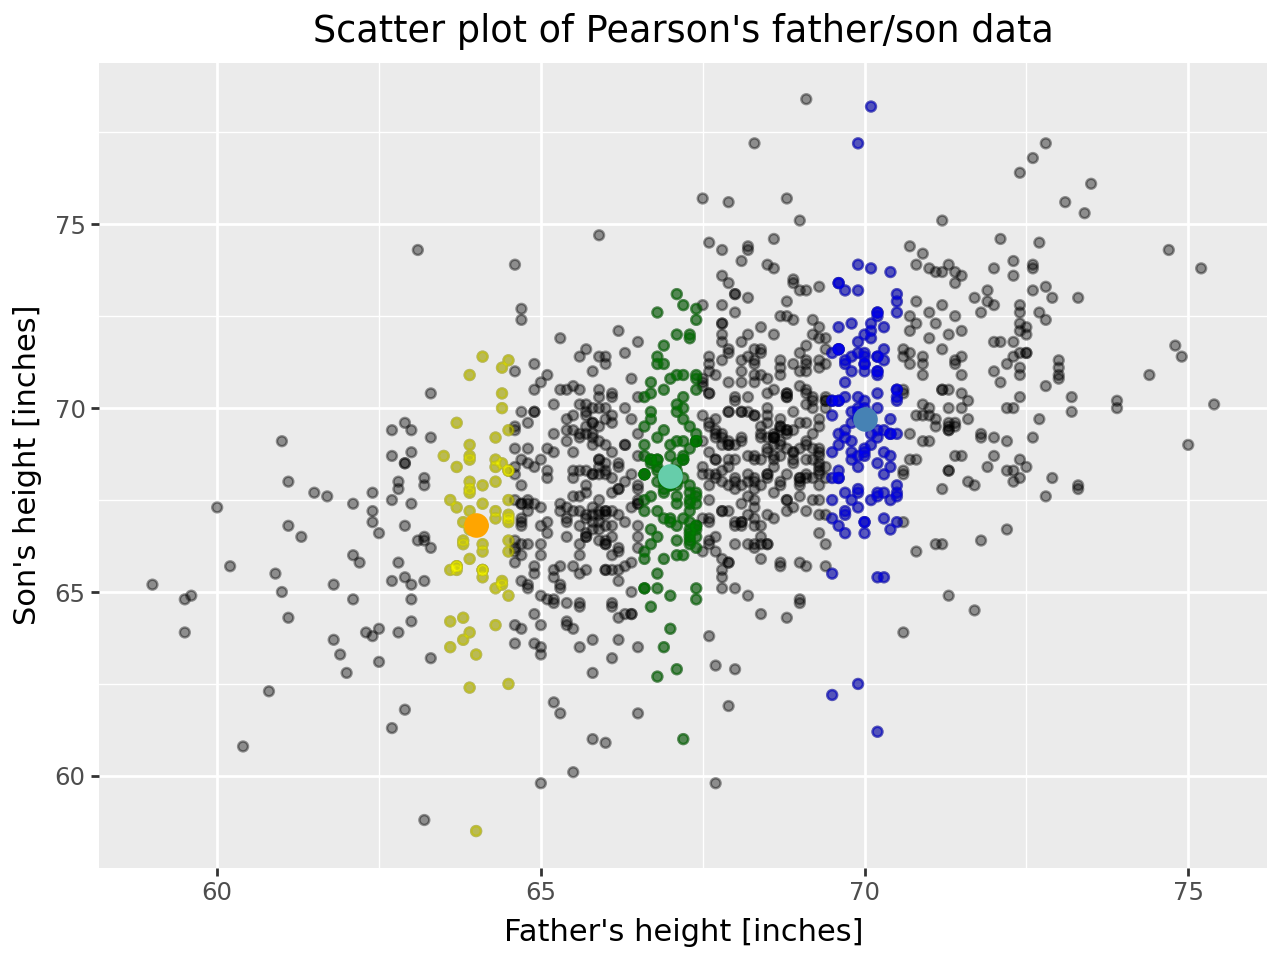

In [63]:
G = (
ggplot(data = df, mapping = aes(x = "Father", y = "Son")) + 
  geom_point(alpha=0.4, colour="black") +
  geom_point(data = df64, alpha = 0.4, colour = "yellow") +
  geom_point(data = df67, alpha = 0.4, colour = "green") +
  geom_point(data = df70, alpha = 0.4, colour = "blue") +
  xlab("Father's height [inches]") +
  ylab("Son's height [inches]") +
  ggtitle("Scatter plot of Pearson's father/son data")
 )

G.show()

G2 = (
G + 
geom_point(data=pd.DataFrame({"Father": [64], "Son": [avgs_64]}),
  color="orange", size=4) + 
geom_point(data=pd.DataFrame({"Father": [67], "Son": [avgs_67]}),
  color="mediumaquamarine", size=4) + 
geom_point(data=pd.DataFrame({"Father": [70], "Son": [avgs_70]}),
  color="steelblue", size=4)
  )

G2.show()

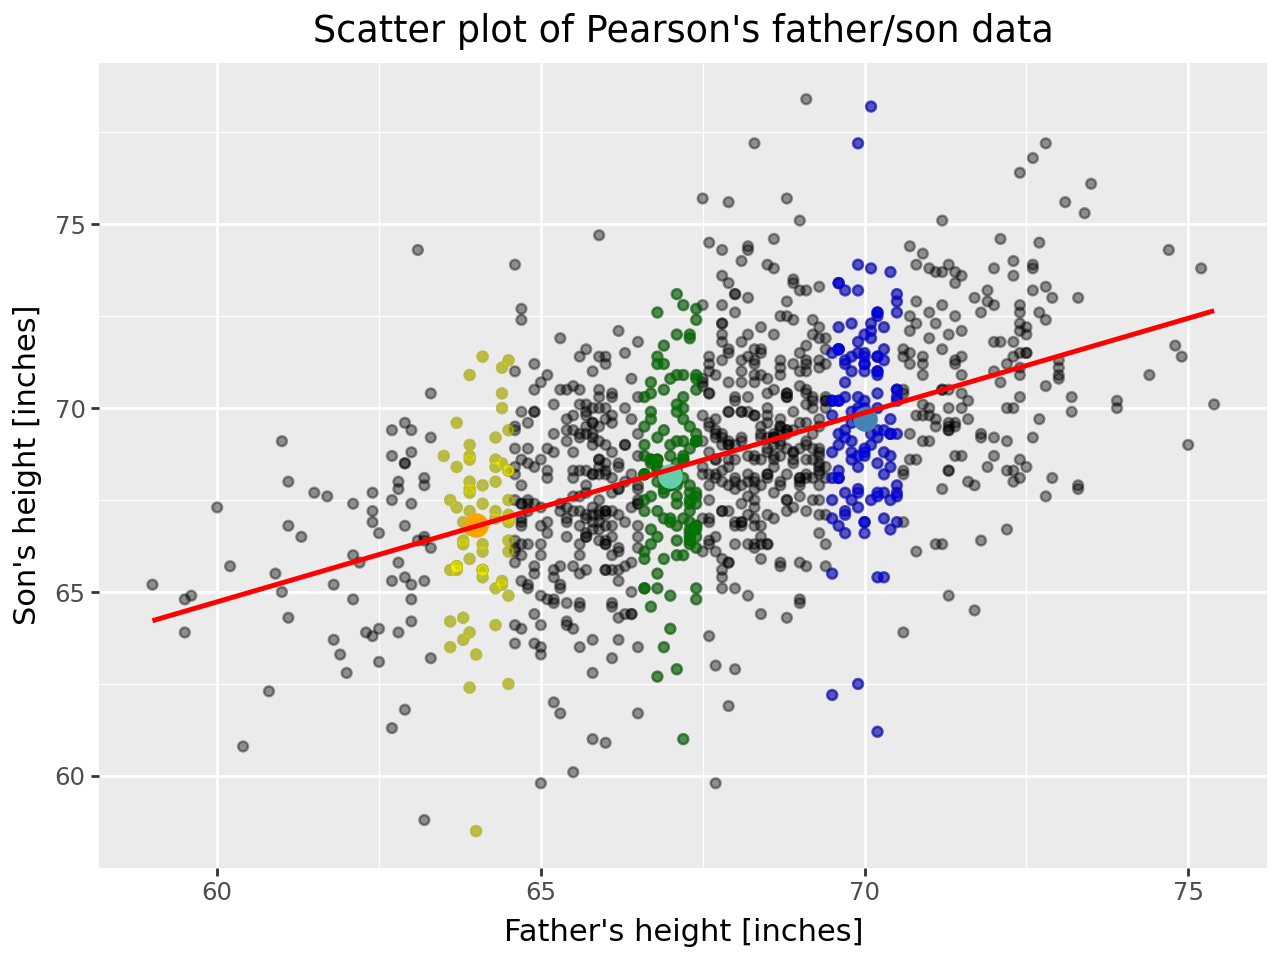

In [67]:
G2 + geom_smooth(method="lm", colour="red", se=False)